In [1]:
import numpy as np
import matplotlib.pyplot as plt
from database_methods import Table, to_show, head
from global_var import *
import sqlite3
con = sqlite3.connect('database_results.db')
cursor = con.cursor()

In [12]:
def spr_spectrum(folder):
    main_folder='C:/SPRUP_data_Jenda/2019_03_13_Jenda_microscopy/'
    with open(main_folder + folder+'spectra_q.txt') as f:
        infolist = f.read()
        info = []
    for i in infolist.split('\n')[:-1]:
        info.append([float(j) for j in i.split('\t')])
    intensity = [] 
    wlength = []
    for row in info:
        wlength.append(row[4])
        intensity.append(row[5])
    return wlength[20:], intensity[20:]

def load_sql(sql_data, columns):
    col = columns.split(', ')

    data = dict()
    for c in col:
        data[c] = []

    for row in sql_data:
        i = 0
        for r in row:
            data[col[i]].append(r)
            i+=1
    return data

def add_spr(axesspr, name):
    wlength, intensity = spr_spectrum(name)
    for tick in axesspr.get_yticklines():
        tick.set_visible(False)

    for tick in axesspr.get_yticklabels():
        tick.set_visible(False)
    axesspr.plot(wlength, intensity, linewidth=2, color=black, label='spectrum', ls = ':')  

In [13]:
mas = Table(connection=con, name='masters')
exp = Table(con, name = 'experiments')
meas = Table(con, name = 'measurements')

In [14]:
print(mas.columns)
print(exp.columns)
print(meas.columns)

CATEGORY, PERIOD, AMPLITUDE, MASTER
DATE, MASTER_ID, DIP, FOLDER
EXPERIMENT_ID, NP, WAVELENGTH, FILE, AR_TH, AR_DIP, AR_NOISE, EXC_THS, RATE, INFO, COUNT, X, Y, CON, INP, INPPX, IBGPX, STD, stdX, stdY, stdCON, stdINP, stdINPPX, stdIBGPX, stdSTD, NOTES, AR_MIN, AR_COND, EXP_TYPE


In [15]:
columns = 'WAVELENGTH, CON, INP, DIP, NOTES'
sql_data = con.execute("""
SELECT {}
FROM 'masters' as MAS 
INNER JOIN 'experiments' as EXP 
ON MAS.ID = EXP.MASTER_ID
INNER JOIN 'measurements' as MEAS
ON EXP.ID = MEAS.EXPERIMENT_ID
WHERE MASTER = 'L3'
ORDER BY WAVELENGTH ASC
;
   """.format(columns))

head(columns)
for row in sql_data:
    print(str(to_show(row)).replace(', ', '\t').replace("'", "")[1:-1])

WAVELEN	CON	INP	DIP	NOTES
737	3.43	12.51	740	bg nois
738	3.04	17.67	740	-
739	3.17	21.61	740	nice
739	3.08	15.79	740	-
739	2.96	12.10	740	FPs
740	3.70	19.31	740	nice
741	3.92	7.49	740	FPs
742	2.47	16.30	740	-
743	3.29	27.79	740	-
743	3.18	21.01	740	-
743	4.37	13.20	740	-
744	2.89	27.43	740	bubles
745	3.66	33.34	740	nice
745	2.98	20.13	740	-
745	3.75	14.86	740	FPs	be
746	3.36	31.20	740	nice
748	3.91	22.18	740	-
750	3.09	11.39	740	bad


In [16]:
columns = 'WAVELENGTH, CON, INP, IBGPX, INPPX'
sql_data = con.execute("""
SELECT {}
FROM 'masters' as MAS 
INNER JOIN 'experiments' as EXP 
ON MAS.ID = EXP.MASTER_ID
INNER JOIN 'measurements' as MEAS
ON EXP.ID = MEAS.EXPERIMENT_ID
WHERE MASTER = 'L3'
ORDER BY WAVELENGTH ASC
;
   """.format(columns))
data = load_sql(sql_data, columns)

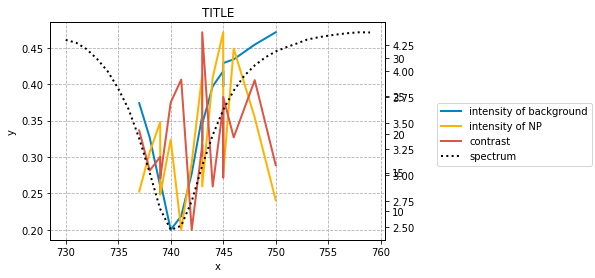

In [17]:
fig, axes = plt.subplots()
axes.grid(linestyle='--')
axes.set_title('TITLE')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes_ii=axes.twinx()


axes.twinx().plot(data['WAVELENGTH'], data['CON'], linewidth=2, color=red, label='contrast') 
axes_ii.plot(data['WAVELENGTH'], data['INP'], linewidth=2, color=yellow, label='intensity of NP')

axes.plot(data['WAVELENGTH'], data['IBGPX'], linewidth=2, color=blue, label='intensity of background')
# axes_ii.plot(data['WAVELENGTH'], data['INPPX'], linewidth=2, color=red, label='intensity of NP', ls = '-.')

add_spr(axes.twinx(), '20_04_15_L3/')

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [46]:
columns = 'WAVELENGTH, CON, INP, IBGPX, INPPX'
sql_data = con.execute("""
SELECT {}
FROM 'masters' as MAS 
INNER JOIN 'experiments' as EXP 
ON MAS.ID = EXP.MASTER_ID
INNER JOIN 'measurements' as MEAS
ON EXP.ID = MEAS.EXPERIMENT_ID
WHERE MASTER = 'K5'
ORDER BY WAVELENGTH ASC
;
   """.format(columns))
data = load_sql(sql_data, columns)

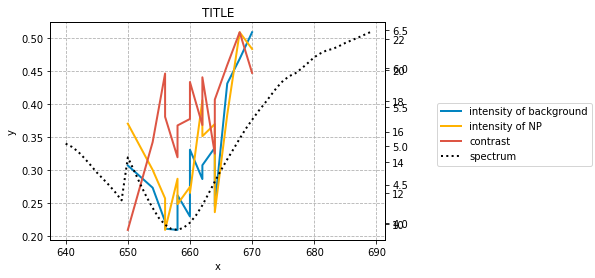

In [47]:
fig, axes = plt.subplots()
axes.grid(linestyle='--')
axes.set_title('TITLE')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes_ii=axes.twinx()


axes.twinx().plot(data['WAVELENGTH'], data['CON'], linewidth=2, color=red, label='contrast') 
axes_ii.plot(data['WAVELENGTH'], data['INP'], linewidth=2, color=yellow, label='intensity of NP')

axes.plot(data['WAVELENGTH'], data['IBGPX'], linewidth=2, color=blue, label='intensity of background')
# axes_ii.plot(data['WAVELENGTH'], data['INPPX'], linewidth=2, color=red, label='intensity of NP', ls = '-.')

add_spr(axes.twinx(), '20_03_16_K5/')

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
